In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from cvxopt import matrix, solvers
from sklearn.preprocessing import Normalizer

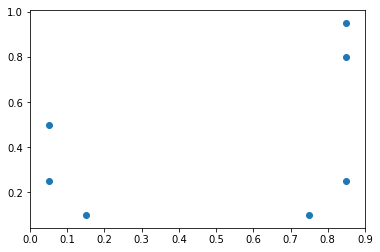

In [347]:
#Linearly Separable data from Homework 2

import math
l1=[]
l2=[]
#Create data
l1.append([.75,.10])
l1.append([.85,.80])
l1.append([.85,.95])
l1.append([.15,.10])
l1.append([.05,.25])
l1.append([.05,.50])
l1.append([.85,.25])
arr_train_x=np.array(l1)
l2.append(-1)
l2.append(-1)
l2.append(1)
l2.append(-1)
l2.append(1)
l2.append(1)
l2.append(-1)
arr_train_y=np.array(l2)
lx=[]
ly=[]
for x in arr_train_x:
    lx.append(x[0])
    ly.append(x[1])
plt.scatter(lx,ly)
plt.show()

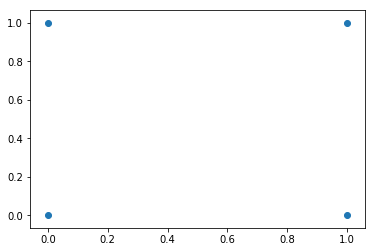

In [258]:
#Linearly Non separable data (XOR)
import math
l1=[]
l2=[]
#Create data
l1.append([0.0,0.0])
l1.append([0.0,1.0])
l1.append([1.0,0.0])
l1.append([1.0,1.0])
ns_arr_train_x=np.array(l1)
l2.append(-1)
l2.append(1)
l2.append(1)
l2.append(-1)
ns_arr_train_y=np.array(l2)
lx=[]
ly=[]
for x in ns_arr_train_x:
    lx.append(x[0])
    ly.append(x[1])
plt.scatter(lx,ly)
plt.show()

In [388]:
#Hard Margin SVM
def train(X, Y):
    K = Y[:, None] * X
    K = np.dot(K, K.T)
    P = matrix(K)
    NUM =X.shape[0]
    A = matrix(Y.reshape(1, -1).astype(float))
    q = matrix(-np.ones((NUM, 1)))
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    
    b = matrix(np.zeros(1))
    #A=A.astype(double)

    sol = solvers.qp(P, q, G, h, A, b)
    #print(sol['x'])
    #print(Y)
    alpha=np.array(sol['x'])
    lambdas=np.sum(alpha*Y.T[:,None]*X,axis=0)
    #print(lambdas)
    #print(alpha.shape)
    #bias=1-min(np.dot(X,lambdas))
    
    support_vectors=(alpha>1e-5).reshape(-1)
    #print(cond)
    #print(np.dot(X[cond],lambdas))
    b=Y[support_vectors]-(np.dot(X[support_vectors],lambdas))
    #print("bias")
    #print(bias)
    bias=b[0]
    #print(bias)
    print("bias"+str(bias))
    print("lambdas"+str(lambdas))
    #print("alphas"+str(alpha))
    #for i in range(len(X)):
    #    print(str(np.dot(lambdas,X[i]))+" "+str(Y[i]))
        
    lx=[]
    ly=[]
    for x in X:
        lx.append(x[0])
        ly.append(x[1])
    plt.scatter(lx,ly)
    #slope=-lambdas[0]/lambdas[1]
    #intercept=-bias[0]/lambdas[1]
    #x = np.arange(0, 1,step=0.1)
    #ax.plot(x, x * slope + intercept, 'k-')
    #plt.show()
    for i in range(len(X)):
        #print(np.sign(arr_train_y[i]*((np.dot(arr_train_x[i],lambdas))+bias))!=np.sign(ns_arr_train_y[i]))
        #print(X[i])
        #print(np.dot(X[i],lambdas)+bias)
        #print(Y[i])
        if(int(np.sign(np.dot(X[i],lambdas)+bias))!=int(np.sign(Y[i]))): 
            print("Not linearly separable")
            break
    return (alpha,bias,lambdas)    
    """for i in range(len(X)):
        #print(np.sign(arr_train_y[i]*((np.dot(arr_train_x[i],lambdas))+bias))!=np.sign(ns_arr_train_y[i]))
        if(((ns_arr_train_y[i]*(np.dot(ns_arr_train_x[i],lambdas)+bias)<1 and ns_arr_train_y[i])>1) or
           ((ns_arr_train_y[i]*(np.dot(ns_arr_train_x[i],lambdas)+bias)>1 and ns_arr_train_y[i])<1)):
            print("Not linearly separable")
            break
        print(arr_train_y[i]*((np.dot(arr_train_x[i],lambdas))+bias))"""
def predict(alpha,bias, lambdas,data):
    return np.sign(np.dot(lambdas,data)+bias)

bias-1.74999998425
lambdas[-11.66666641  13.33333305]
PREDICTION=-1.0


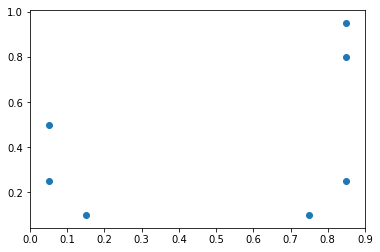

In [389]:
#Check for Linearly Separable Data
(alpha,bias,lambdas)=train(arr_train_x,arr_train_y)
arr_test_x=[0.6,0.2]
prediction=predict(alpha, bias, lambdas,arr_test_x)
print("PREDICTION="+str(prediction))

bias-1.0
lambdas[ 0.  0.]
Not linearly separable


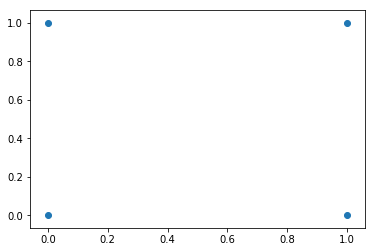

In [390]:
#Check for Linearly Non Separable Data
alpha=train(ns_arr_train_x,ns_arr_train_y)

Accuracy: 0.7727272727272727
ROC Curve:


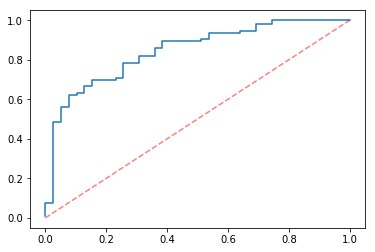

AUC: 0.8428453267162944


In [368]:
#4(b)  - Linear Kernel
from matplotlib.colors import ListedColormap
data = pd.read_csv("C:\\Users\\Vishnutej\\Desktop\\ML 2018\\HW4\\creditCard.csv")
#data = preprocessing.scale(data)
#print(data.head())
#print(data.shape)

#np.random.seed(seed=2018)
data0=preprocessing.scale(data.iloc[:,0:9])
data1=preprocessing.normalize(data0)#.iloc[:,0:9])
data2=pd.DataFrame(data1)
#print(data2.shape)
#print(data.iloc[:-1].shape)
data3=pd.DataFrame(data.iloc[:,-1])
#print(data3.shape)
#d=data2.join(data3)
d = pd.concat([data2, data3], axis=1)
#print(d.shape)
dat=pd.DataFrame(d)

train,test=train_test_split(dat,test_size=.1,random_state=2018,shuffle=False)
sv=SVC(kernel='linear',probability=True)

sv.fit(train.iloc[:,0:9],train.iloc[:,-1])

hard_pred = sv.predict(test.iloc[:,0:9])
#print(hard_pred)
#print(test.iloc[:,9])
acc = np.isclose(hard_pred,test.iloc[:,-1]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

#print(test.iloc[:,9])

soft_pred = sv.predict_proba(test.iloc[:,0:9])
#print(soft_pred)
fpr,tpr,thresh = roc_curve(test.iloc[:,-1],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,-1],soft_pred[:,1])
print("ROC Curve:")

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))


Accuracy: 0.7727272727272727
ROC Curve:


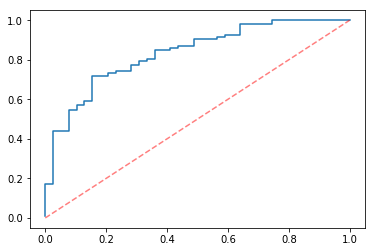

AUC: 0.8329197684036393


In [371]:
#4(c) - RBF with sigma squared = 5
data = pd.read_csv("C:\\Users\\Vishnutej\\Desktop\\ML 2018\\HW4\\creditCard.csv")
#data = preprocessing.scale(data)
#print data.head()
#print(data.shape)

#np.random.seed(seed=2018)
data0=preprocessing.scale(data.iloc[:,0:9])
data1=preprocessing.normalize(data0)#.iloc[:,0:9])
data2=pd.DataFrame(data1)
#print(data2.shape)
#print(data.iloc[:-1].shape)
data3=pd.DataFrame(data.iloc[:,-1])
#print(data3.shape)
#d=data2.join(data3)
d = pd.concat([data2, data3], axis=1)
#print(d.shape)
dat=pd.DataFrame(d)
#trainX=pd.DataFrame(trainX)
train,test=train_test_split(dat,test_size=.1,random_state=2018,shuffle=False)
sv1=SVC(kernel='rbf',gamma=0.2,probability=True)
sv1.fit(train.iloc[:,0:9],train.iloc[:,-1])

hard_pred = sv1.predict(test.iloc[:,0:9])
#print(hard_pred)
#print(test.iloc[:,9])
acc = np.isclose(hard_pred,test.iloc[:,-1]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

#print(test.iloc[:,9])

soft_pred = sv1.predict_proba(test.iloc[:,0:9])
#print(soft_pred)
fpr,tpr,thresh = roc_curve(test.iloc[:,-1],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,-1],soft_pred[:,1])
print("ROC Curve:")

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

Accuracy: 0.7803030303030303
ROC Curve:


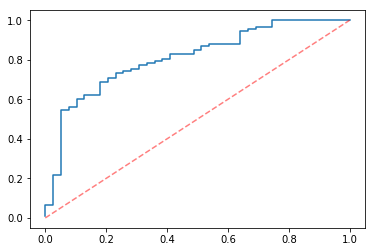

AUC: 0.8100358422939068


In [375]:
#4(c) - RBF with sigma squared = 25
data = pd.read_csv("C:\\Users\\Vishnutej\\Desktop\\ML 2018\\HW4\\creditCard.csv")
#data = preprocessing.scale(data)
#print data.head()
#print(data.shape)

#np.random.seed(seed=2018)
data0=preprocessing.scale(data.iloc[:,0:9])
#min_max_scaler = preprocessing.MinMaxScaler()
#data0 = min_max_scaler.fit_transform(data00)
data1=preprocessing.normalize(data0)#.iloc[:,0:9])
data2=pd.DataFrame(data1)
#print(data2.shape)
#print(data.iloc[:-1].shape)
data3=pd.DataFrame(data.iloc[:,-1])
#print(data3.shape)
#d=data2.join(data3)
d = pd.concat([data2, data3], axis=1)
#print(d.shape)
dat=pd.DataFrame(d)
#trainX=pd.DataFrame(trainX)
train,test=train_test_split(dat,test_size=0.1,random_state=2018,shuffle=False)
sv2=SVC(kernel='rbf',gamma= 0.04,probability=True)
sv2.fit(train.iloc[:,0:9],train.iloc[:,-1])

hard_pred = sv2.predict(test.iloc[:,0:9])
#print(hard_pred)
#print(test.iloc[:,9])
acc = np.isclose(hard_pred,test.iloc[:,-1]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

#print(hard_pred)

soft_pred = sv2.predict_proba(test.iloc[:,0:9])
#print(soft_pred)
fpr,tpr,thresh = roc_curve(test.iloc[:,-1],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,-1],soft_pred[:,1])
print("ROC Curve:")

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))